<a href="https://colab.research.google.com/github/ijunseo/Deeplearning_self_study/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%A8%E3%83%83%E3%82%BB%E3%83%B3%E3%82%B9%E7%B7%B4%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ライブラリー


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

#numpy

[KIYOさんのブログより引用したものが多いです](https://note.com/kiyo_ai_note/n/n5313ce44ce33)

```python
import numpy as np #numpyをnpとしてインポート
```
##行列生成
```python
np.empty((3, 6))# 3 x 6の行列を生成（要素はダミーなので一定ではない）
np.zeros((2, 2))# 2 x 2の行列を生成（要素が0）
np.ones((2, 2))# 2 x 2の行列を生成（要素が1）
np.full(([a, b], c)) # a x b行列の要素をすべてc に埋める
np.eye((2, 5)) # 2 x 5行列を作って、[a, a] 要素を1 にする行列を作成
np.arange(9).reshape(3, 3)# 3 x 3の行列を生成（0 ~ 8までの要素）
```
##行列要素確認
```python
array.shape #(多次元)配列の形状
array.dtype #配列内のデータ型
array.ndim #配列の次元数(a x bなら 1, a x b x cなら2 ....)
array.size #配列全体のパラメータ数(要素の数）
```
##行列積
```python
np.dot(a, b)
a.dot(b)
a @ b
#行列積計算
```
##行列ソート
```python
np.sort()#[::-1] #配列を降順にソート
a_sort = np.sort(a_2dim) #配列を昇順にソート
a_sortax0 = np.sort(a_2dim, axis=0) #行方向に昇順にソート
a_sortinv = np.sort(a_2dim)[::-1] #配列を降順にソート
a_sort1dim = np.sort(a_2dim, axis=None) #1次元配列に変換
a_sortall = np.sort(a_2dim, axis=None).reshape(a_2dim.shape) #1次元配列でソート後にreshapeで形状復元

"""
出力
array([[  0,  10,  30,  50,  60,  70],
       [ 20,  40,  80,  90, 100, 110]])
array([[ 60,   0,  20,  30,  50,  10],
       [100,  80,  70,  40,  90, 110]])
array([[ 20,  40,  80,  90, 100, 110],
       [  0,  10,  30,  50,  60,  70]])
array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110])
array([[  0,  10,  20,  30,  40,  50],
       [ 60,  70,  80,  90, 100, 110]])
"""

```
##転置行列(transpose)
```python
array.T
np.transpose(array)
```
##条件を満たす値を探す
```python
np.where(array > 7, 0, 1) #np.where（条件、置き換える値、条件を満たさない要素の値）

[Out]
array([[1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0]])

----------------------------------------------------------------
a_bool = array > 7 #7超の数値はTrue, 以下はFalse
a_up7 = array[array > 7] #7超の数値のみ抽出

[Out]
array([[False, False, False, False, False, False],
       [False, False,  True,  True,  True,  True]])
array([ 8,  9, 10, 11])
```
##上限下限設定
```python
np.clip(array,2,7)
#2より小さい要素を2に、7より大きい要素を7にする
```
##統計関連

```python
#np.--(array) or array.--()
np.sum(array)
array.sum() #要素の合計
np.mean(array)#平均
np.var(array)#分散
np.std(array)#標準偏差
----------
#NANを無視した統計
np.nansum(array)#NAN値を無視した合計
np.nanmean(array)#NAN値を無視した平均
----------
np.argmax(array)#最大値のindexをreturn
np.argmin(array)#最小値のindexをreturn
# 2 x 2の場合
0 1
2 3
のindexを持つ

```

##linalg module

```python
np.linalg.inv(array)#逆行列
np.linalg.solve(array1, array2)# (array1) * x = (array2)を計算する
np.linalg.det(array)#行列式
eig_val , eig_vec = np.linalg.eig(array)#固有値と固有ベクトル
```

###参考
https://note.com/kiyo_ai_note/n/n835dd978ea35

機械学習のエッセンス加藤公一著


#scipy

```python
a = scipy.sparse.lil_matrix((4, 5)) # 4 x 5零行列を生成
a[1, 1] = 3 # [a, b] = c で a 行 b 列の要素を c にする[1][1]ではない
a.toarray() # 行列(array)化する
```
##LU分解
```python
scipy.linalg.lu_factor(array)
#LU分解を行って2つの結果をreturn
#1はLとUを結合して1つの行列にしたもの（行列の積ではない）2はPivot

scipy.linalg.lu_solve((return1, return2), vec)
```

#1~4章

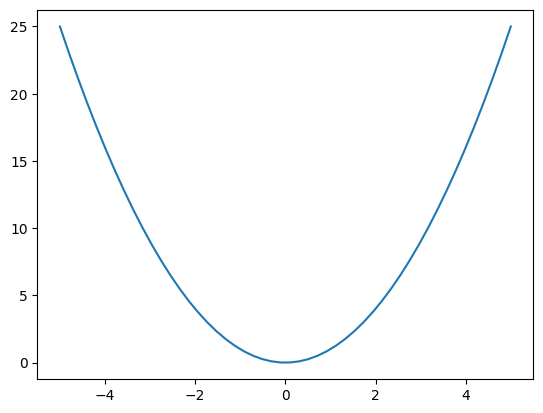

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5)
y = x ** 2
plt.plot(x, y)
plt.show()

In [2]:
class person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

student = person('A', 4)
print(student.name)
print(student.age)

A
4


In [3]:
s = 0
for i in range(1000):
    s += 0.001
s

1.0000000000000007

In [4]:
new_array = np.empty((3, 6))#要素が0でないことに注意
new_array

array([[ 3.22090466e-316,  0.00000000e+000,  1.61501212e-243,
        -1.74287009e-038,  6.82736430e+038, -1.59019978e+213],
       [-1.77108776e+299,  1.72532640e-254,  6.35987556e-176,
         1.05591916e-086,  1.34174322e-062,  3.04382637e-144],
       [ 8.68831098e-294, -2.83472953e-059, -5.03451380e+303,
         2.40783594e-286, -5.75898165e+172,  1.09383081e-302]])

In [6]:
new_array = np.zeros((2, 2))#要素が0
new_array

array([[0., 0.],
       [0., 0.]])

In [7]:
new_array = np.ones((2, 2))
new_array

array([[1., 1.],
       [1., 1.]])

In [8]:
new_array = np.linspace(0, 100, 21)
new_array

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

In [9]:
a = np.arange(9).reshape(3, 3)
print(a)
b = np.arange(3, 12).reshape(3, 3)
print(b)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [10]:
c = a@b#行列掛け算
print(c)

[[ 24  27  30]
 [ 78  90 102]
 [132 153 174]]


In [12]:
matrix_multiplication = np.dot(a, b)
newmat = a.dot(b)
newmat1 = a@b
print(matrix_multiplication)
print(newmat)
print(newmat1)

[[ 24  27  30]
 [ 78  90 102]
 [132 153 174]]
[[ 24  27  30]
 [ 78  90 102]
 [132 153 174]]
[[ 24  27  30]
 [ 78  90 102]
 [132 153 174]]


In [28]:
a = scipy.sparse.lil_matrix((4, 5))
a[1, 2] = 3
a.toarray()


array([[0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [20]:
a1 = a.tocsr()
a1

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [26]:
print(f"data: {a1.data}")

data: []


In [35]:
a = [[1,2,3,5,7,9,10,11],
             [1,2,3,5,7,9,10,12]]


print('argmax:', np.argmax(a),'argmin:', np.argmin(a)) #最大値のindex番号, 最小値のindex番号


argmax: 15 argmin: 0


In [40]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve

# 행렬 a 정의
a = np.array([[3, 1, 2],
              [6, 3, 4],
              [3, 2, 1]], dtype=float)

# LU 분해 수행
lu, piv = lu_factor(a)

print("LU 행렬:\n", lu)
print("Pivot 인덱스:\n", piv)

print("LU:", piv @ lu)
# 추가로 LU 분해로부터 해법을 찾을 수 있음
b = np.array([1, 2, 3], dtype=float)  # 예를 위한 b
x = lu_solve((lu, piv), b)  # LU 분해된 행렬과 b를 사용하여 x를 구함
print("해법 x:\n", x)

LU 행렬:
 [[ 6.   3.   4. ]
 [ 0.5 -0.5  0. ]
 [ 0.5 -1.  -1. ]]
Pivot 인덱스:
 [1 1 2]
LU: [7.5 0.5 2. ]
해법 x:
 [ 1.66666667 -0.         -2.        ]
